In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from scipy.signal import savgol_filter
import io
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde

In [2]:
# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

In [3]:
#Load data from csv
def load_csv_data(filename="concept_drift_results.csv"):
    """
    Load data from a CSV file in the same GitHub folder.
    
    Parameters:
    filename (str): Name of the CSV file to read, defaults to 'concept_drift_results.csv'
    
    Returns:
    pandas.DataFrame: The data from the CSV file
    """
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found in the current directory.")
        return None
    except Exception as e:
        print(f"Error loading CSV data: {e}")
        return None

In [ ]:
# Main visualization function
def visualize_concept_drift():

    # Load data
    df = load_csv_data()
    
    # Create figure with multiple plots
    fig = plt.figure(figsize=(16, 16))
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], hspace=0.5, wspace=0.4)

    # 1. Line Plot with Critical Points
    ax1 = fig.add_subplot(gs[0, :])
    create_line_plot_with_critical_points(df, ax1)
    
    # 2. Heatmap
    ax2 = fig.add_subplot(gs[1, 0])
    create_heatmap(df, ax2)
    
    # 3. Distribution Change Analysis
    ax3 = fig.add_subplot(gs[1, 1])
    create_distribution_analysis(df, ax3)
    
    # 4. Drift Magnitude Plot
    ax4 = fig.add_subplot(gs[2, 0])
    create_drift_magnitude_plot(df, ax4)
    
    # 5. Segmented Performance Analysis
    ax5 = fig.add_subplot(gs[2, 1])
    create_segmented_performance(df, ax5)
    
    # Add title
    fig.suptitle("Comprehensive Analysis of Concept Drift in Model Performance", fontsize=18, fontweight='bold', y=0.98)
    
    # Adjust spacing and layout
    fig.subplots_adjust(hspace=0.5, wspace=0.4, top=0.92)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
    
    # Save and show
    fig.savefig("concept_drift_analysis.png", dpi=300, bbox_inches='tight', pad_inches=0.5, facecolor='white')
    plt.show()
    print("Main visualization completed and saved to 'concept_drift_analysis.png'")

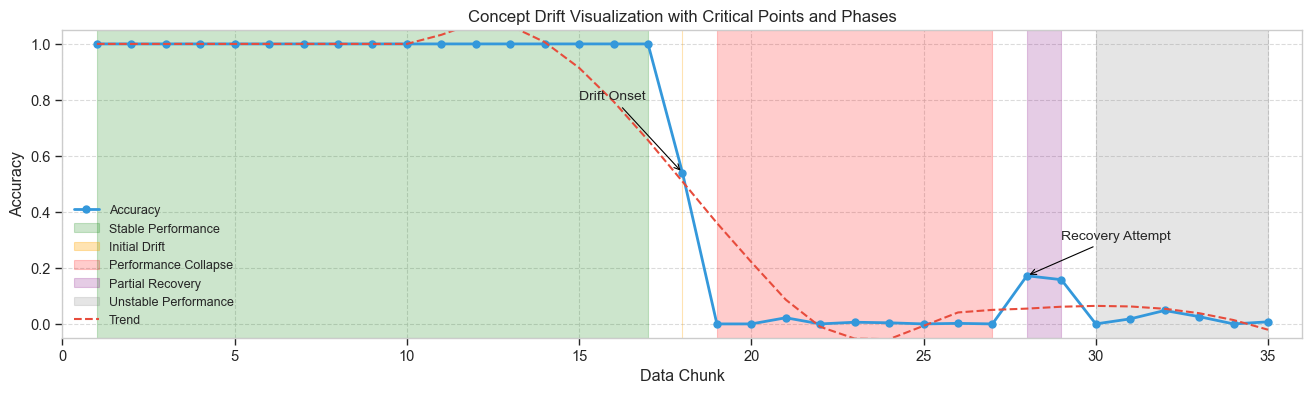

Graph successfully exported to concept_drift_lineplot.png
Accuracy values range: 0.0 to 1.0


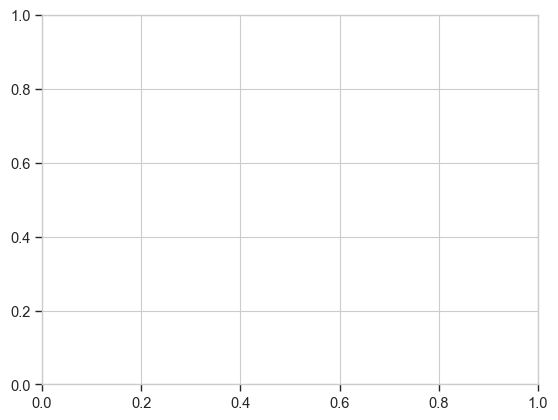

Graph successfully exported to concept_drift_heatmap.png


C:\Users\kiarn\AppData\Local\Temp\ipykernel_26508\1053227719.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle


Main visualization completed and saved to 'concept_drift_analysis.png'


In [51]:
#Test function and ensure all graphs are present and well formatted
visualize_concept_drift()

In [5]:
# 1. Line Plot with Critical Points and Context
def create_line_plot_with_critical_points(df,ax):

    # Plot the raw data
    ax.plot(df['chunk'], df['accuracy'], 'o-', color='#3498db', lw=2, ms=5, label='Accuracy')
    
    # Calculate the derivative (rate of change)
    df['rate_of_change'] = df['accuracy'].diff()
    
    # Identify critical points using rate of change
    stable_region = df.loc[df['chunk'] <= 17]
    transition_start = df.loc[df['chunk'] == 18]
    collapse_region = df.loc[(df['chunk'] > 18) & (df['chunk'] <= 27)]
    recovery_attempt = df.loc[(df['chunk'] > 27) & (df['chunk'] <= 29)]
    unstable_region = df.loc[df['chunk'] > 29]
    
    # Highlight regions
    ax.axvspan(stable_region['chunk'].min(), stable_region['chunk'].max(), alpha=0.2, color='green', label='Stable Performance')
    ax.axvspan(transition_start['chunk'].min(), transition_start['chunk'].max(), alpha=0.3, color='orange', label='Initial Drift')
    ax.axvspan(collapse_region['chunk'].min(), collapse_region['chunk'].max(), alpha=0.2, color='red', label='Performance Collapse')
    ax.axvspan(recovery_attempt['chunk'].min(), recovery_attempt['chunk'].max(), alpha=0.2, color='purple', label='Partial Recovery')
    ax.axvspan(unstable_region['chunk'].min(), unstable_region['chunk'].max(), alpha=0.2, color='gray', label='Unstable Performance')
    
    # Add trendline using Savitzky-Golay filter
    if len(df) > 5:  # Only apply if we have enough data points
        window_size = min(15, len(df) - (len(df) % 2) - 1)  # Must be odd and less than data length
        if window_size >= 3:
            y_smoothed = savgol_filter(df['accuracy'], window_size, 3)
            ax.plot(df['chunk'], y_smoothed, '--', color='#e74c3c', lw=1.5, label='Trend')
    
    # Add critical point annotations
    drift_point = 18
    ax.annotate('Drift Onset', xy=(drift_point, df.loc[df['chunk'] == drift_point, 'accuracy'].values[0]),
                xytext=(drift_point-3, 0.8), arrowprops=dict(arrowstyle='->'), fontsize=10)
    
    recovery_point = 28
    if recovery_point in df['chunk'].values:
        ax.annotate('Recovery Attempt', xy=(recovery_point, df.loc[df['chunk'] == recovery_point, 'accuracy'].values[0]),
                    xytext=(recovery_point+1, 0.3), arrowprops=dict(arrowstyle='->'), fontsize=10)
    
    # Customize the plot
    ax.set_xlabel('Data Chunk')
    ax.set_ylabel('Accuracy')
    ax.set_title('Concept Drift Visualization with Critical Points and Phases', fontsize=12)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(0, df['chunk'].max() + 1)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='lower left', fontsize=9)

    #Save figure
    output_file = "concept_drift_lineplot.png"
    plt.show()
    #plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Graph successfully exported to {output_file}")

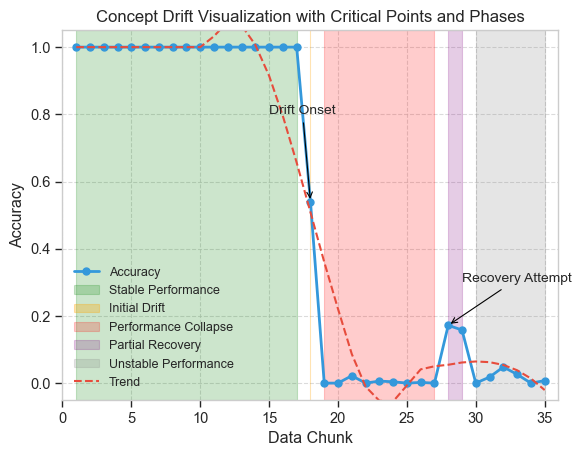

Graph successfully exported to concept_drift_lineplot.png


In [6]:
#Testing formatting and for issues
#Load data
df = load_csv_data()
ax = plt.subplot()
create_line_plot_with_critical_points(df,ax)

In [ ]:
# 2. Heatmap visualization
def create_heatmap(df, ax):

    # Create a 2D representation for the heatmap
    heatmap_data = np.zeros((10, len(df)))
    for i, acc in enumerate(df['accuracy']):
        # Fill columns according to accuracy value (higher accuracy = more filled cells)
        filled_cells = int(acc * 10)
        heatmap_data[:filled_cells, i] = acc
        
    # Create a custom colormap from white to blue
    colors = [(1, 1, 1), (0.12, 0.47, 0.71)]
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
    
    # Plot heatmap
    im = ax.imshow(heatmap_data, aspect='auto', cmap=cmap, interpolation='nearest')
    
    # Customize the plot
    ax.set_xticks(range(0, len(df), 5))
    ax.set_xticklabels([str(x) for x in df['chunk'].iloc[::5]])
    ax.set_yticks([])
    ax.set_xlabel('Data Chunk')
    ax.set_title('Accuracy Heatmap Visualization', fontsize=12)

    return ax
    


Accuracy values range: 0.0 to 1.0


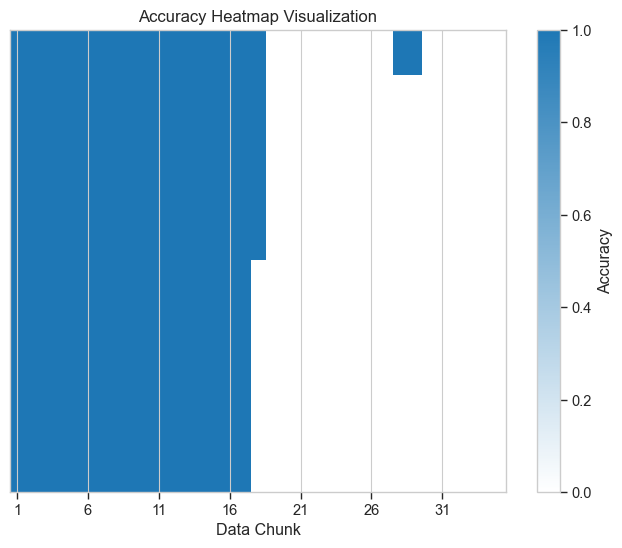

Graph successfully exported to concept_drift_heatmap.png


<Figure size 640x480 with 0 Axes>

In [28]:
#Testing formatting and for issues
#Create individual plot
plt.figure(figsize=(8, 6))
dist_ax = plt.gca()
create_heatmap(df, dist_ax)
plt.tight_layout()



In [25]:
# 3. Distribution Change Analysis
def create_distribution_analysis(df, ax):

    # Define periods for comparison
    period1 = df.loc[df['chunk'] <= 17, 'accuracy']  # Stable period
    period2 = df.loc[df['chunk'] > 17, 'accuracy']   # After drift
    
    # Calculate KDE for both periods
    if len(period1) > 1 and len(period2) > 1:
        x = np.linspace(-0.05, 1.05, 1000)
        
        # Handle the case where all values are the same (KDE would fail)
        if period1.std() > 0:
            kde1 = gaussian_kde(period1)
            y1 = kde1(x)
        else:
            # Create a spike at the constant value
            y1 = np.zeros_like(x)
            idx = np.argmin(np.abs(x - period1.iloc[0]))
            y1[idx-5:idx+5] = 1.0
            
        if period2.std() > 0:
            kde2 = gaussian_kde(period2)
            y2 = kde2(x)
        else:
            y2 = np.zeros_like(x)
            idx = np.argmin(np.abs(x - period2.iloc[0]))
            y2[idx-5:idx+5] = 1.0
        
        # Plot the KDEs
        ax.fill_between(x, y1, alpha=0.5, color='green', label='Before Drift (Chunks 1-17)')
        ax.fill_between(x, y2, alpha=0.5, color='red', label='After Drift (Chunks 18-35)')
        
    else:
        # Fallback to histogram for small samples
        ax.hist(period1, bins=10, alpha=0.5, color='green', label='Before Drift')
        ax.hist(period2, bins=10, alpha=0.5, color='red', label='After Drift')
    
    # Calculate statistics for annotations
    mean1, std1 = period1.mean(), period1.std()
    mean2, std2 = period2.mean(), period2.std()
    
    # Add annotations
    ax.annotate(f'Before: μ={mean1:.2f}, σ={std1:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", alpha=0.7))
    
    ax.annotate(f'After: μ={mean2:.2f}, σ={std2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction',
                fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.7))
    
    # Customize the plot
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Density')
    ax.set_title('Distribution Change Before and After Drift', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

    # Return the axis (no saving/showing here as it's part of a larger figure)
    return ax

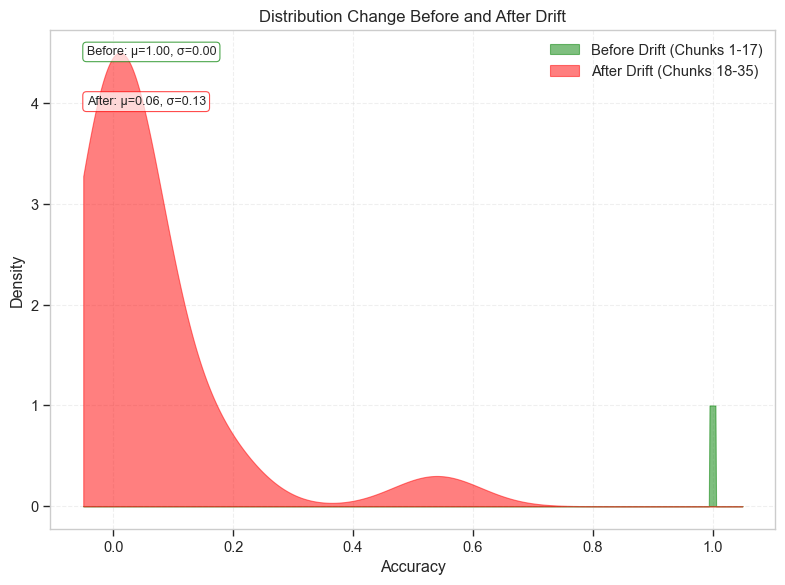

In [27]:
#Testing formatting and for issues
#create and save individual plot
plt.figure(figsize=(8, 6))
dist_ax = plt.gca()
create_distribution_analysis(df, dist_ax)
plt.tight_layout()
#plt.savefig("distribution_change_analysis.png", dpi=300, bbox_inches='tight')


In [30]:
# 4. Drift Magnitude Analysis
def create_drift_magnitude_plot(df, ax ):

    # Calculate magnitude of change between consecutive chunks
    df['change_magnitude'] = df['accuracy'].diff().abs()
    
    # Remove the first row where diff is NaN
    plot_df = df.dropna(subset=['change_magnitude'])
    
    # Create bar plot for change magnitude
    bars = ax.bar(plot_df['chunk'], plot_df['change_magnitude'], color='#3498db', alpha=0.7)
    
    # Highlight significant changes
    threshold = 0.1
    for i, bar in enumerate(bars):
        if plot_df['change_magnitude'].iloc[i] > threshold:
            bar.set_color('#e74c3c')
    
    # Find the point of maximum change
    max_change_idx = plot_df['change_magnitude'].idxmax()
    max_change_chunk = plot_df.loc[max_change_idx, 'chunk']
    max_change_value = plot_df.loc[max_change_idx, 'change_magnitude']
    
    # Annotate the point of maximum change
    ax.annotate(f'Max Change: {max_change_value:.2f}', 
                xy=(max_change_chunk, max_change_value),
                xytext=(max_change_chunk, max_change_value + 0.1),
                arrowprops=dict(arrowstyle='->'),
                fontsize=10)
    
    # Add a horizontal line for the threshold
    ax.axhline(y=threshold, color='red', linestyle='--', alpha=0.7, label=f'Threshold ({threshold})')
    
    # Customize the plot
    ax.set_xlabel('Data Chunk')
    ax.set_ylabel('Magnitude of Change')
    ax.set_title('Drift Magnitude Analysis', fontsize=12)
    ax.set_ylim(0, min(1.1, plot_df['change_magnitude'].max() * 1.2))
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

    return ax


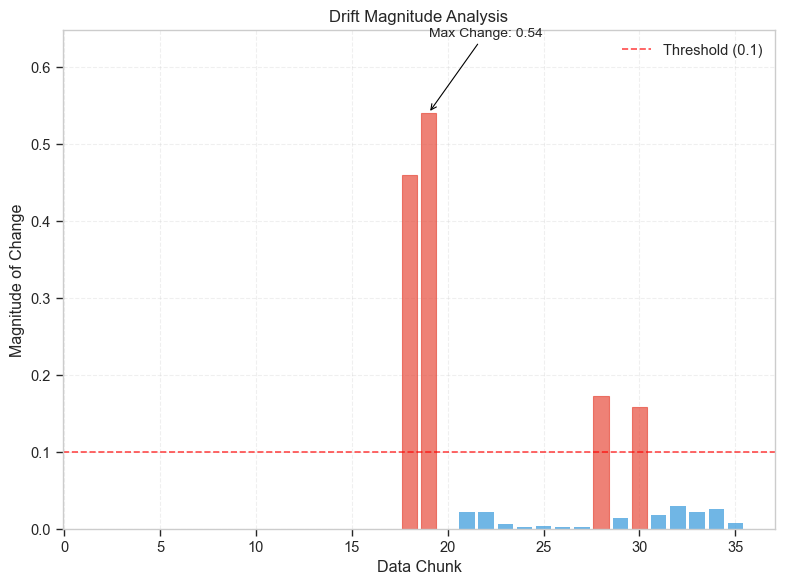

In [31]:
#Create individual plot
plt.figure(figsize=(8, 6))
dist_ax = plt.gca()
create_drift_magnitude_plot(df, dist_ax)
plt.tight_layout()

In [32]:
# 5. Segmented Performance Analysis
def create_segmented_performance(df, ax):

    # Define segments based on the data pattern
    segments = [
        ('Stable', 1, 17),
        ('Transition', 18, 18),
        ('Collapse', 19, 27),
        ('Attempted Recovery', 28, 29),
        ('Unstable', 30, df['chunk'].max())
    ]
    
    # Calculate mean accuracy for each segment
    segment_means = []
    for name, start, end in segments:
        segment_data = df[(df['chunk'] >= start) & (df['chunk'] <= end)]
        segment_means.append((name, segment_data['accuracy'].mean()))
    
    # Create the bar plot
    colors = ['green', 'orange', 'red', 'purple', 'gray']
    bars = ax.bar([x[0] for x in segment_means], [x[1] for x in segment_means], color=colors, alpha=0.7)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)
    
    # Customize the plot
    ax.set_xlabel('Performance Phase')
    ax.set_ylabel('Mean Accuracy')
    ax.set_title('Segmented Performance Analysis', fontsize=12)
    ax.set_ylim(0, 1.05)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=15, ha='right')
    
    ax.grid(True, linestyle='--', alpha=0.3)

    return ax


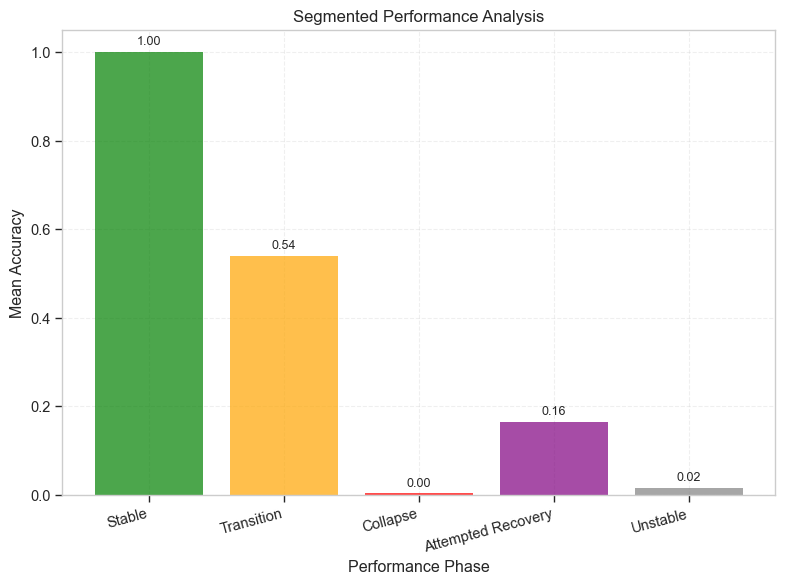

In [33]:
#Create individual plot
plt.figure(figsize=(8, 6))
dist_ax = plt.gca()
create_segmented_performance(df, dist_ax)
plt.tight_layout()